In [5]:
import numpy as np 
import matplotlib.pyplot as plt

## Stochastic Gradient Descent

In [1]:
class StochasticGradientDescent:
    def __init__(self, learning_rate=1, max_iterations=10000):        
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        
           
        
    def predict(self, X):
        return np.dot(X, self.theta.T)
    def cost(self, X, y):
        y_pred = self.predict(X)
        loss = (y - y_pred) ** 2
        return np.mean(loss)    
    def grad(self, X, y):        
        y_pred = self.predict(X)
        errors = y_pred - y
        gradients = (2) * np.dot(X.T, errors)
        return gradients
    
    def fit(self, X, y, verbose=False):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        self.num_samples,self.num_features = X.shape       
        self.theta = np.zeros(self.num_features)          
        theta_hist = [self.theta]  
        cost_hist = [self.cost(X, y)]  
        for iter in range(self.max_iterations):
            i = np.random.randint(self.num_samples)
            x_i = X[i]
            y_i = y[i]
            g = self.grad(x_i, y_i) 
            step = self.learning_rate * g  
            self.theta = self.theta - step  
            theta_hist.append(self.theta) 
            J = self.cost(X, y)  
            cost_hist.append(J)  
            if verbose:
                print(f"Iter: {iter}, Gradient: {g}, Weights: {self.theta}, Cost: {J}")                
            
            
        
        self.iterations = iter + 1
        self.theta_hist = theta_hist
        self.cost_hist = cost_hist
        
        return self

- momentum
- Nesterov Accelerated Gradient
- AdaGrad
- RMSprop
- Adam

 ## PyTorch 

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

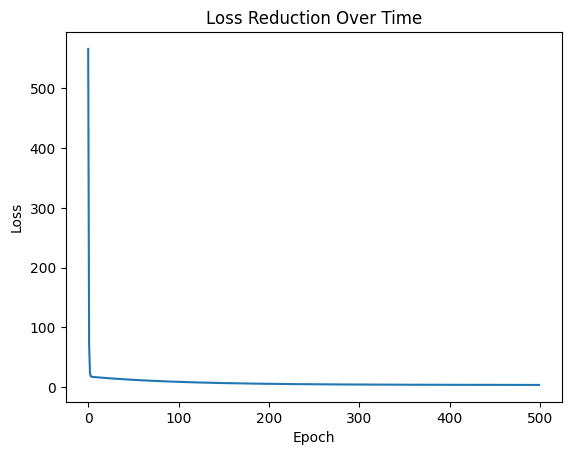

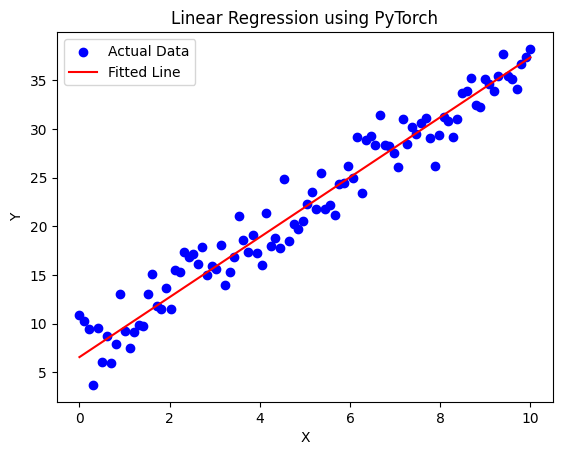

In [7]:
torch.manual_seed(42)  
X = torch.linspace(0, 10, 100).reshape(-1, 1)  
Y = 3 * X + 7 + torch.randn(X.size()) * 2  

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
#optimizer = optim.Adagrad(model.parameters(), lr=0.1)
#optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9)
#optimizer = optim.Adam(model.parameters(), lr=0.1)


num_epochs = 500
losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()  
    outputs = model(X) 
    loss = criterion(outputs, Y)  
    losses.append(loss.item())
    loss.backward()  
    optimizer.step() 

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Time')
plt.show()

predicted = model(X).detach()
plt.scatter(X, Y, label="Actual Data", color='blue')
plt.plot(X, predicted, label="Fitted Line", color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using PyTorch')
plt.show()   

## TensorFlow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam


### Стохастический градиентный спуск (SGD)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(1, activation='sigmoid')
])
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### Momentum

- **momentum**: Параметр Momentum. Определяет, какая доля предыдущего обновления будет добавлена к текущему градиенту. Обычно находится в диапазоне от 0 (без Momentum) до 1. Большие значения помогают ускорить SGD и сделать его более устойчивым к осцилляциям.

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(1, activation='sigmoid')
])
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### Nesterov Accelerated Gradient

- **nesterov**: Установка True активирует Nesterov Accelerated Gradient. Этот метод "смотрит вперед", корректируя направление не только на основе текущего градиента, но и предвидя будущее обновление, что обычно приводит к более быстрой и эффективной сходимости.

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(1, activation='sigmoid')
])
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### Адаптивные методы оптимизации AdaGrad

- **learning_rate**: Скорость обучения. Определяет размер шага, используемого для обновления весов. В AdaGrad этот параметр может быть менее чувствителен, поскольку алгоритм адаптирует скорость обучения на основе градиентов.
- **initial_accumulator_value**: Начальное значение для аккумуляторов, которые хранят квадраты градиентов. Обычно это небольшое положительное число.
- **epsilon**: Маленькое число, предотвращающее деление на ноль во время обновления весов.

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(1, activation='sigmoid')
])
optimizer = Adagrad(learning_rate=0.01, initial_accumulator_value=0.1, epsilon=1e-7)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### RMSprop

- **learning_rate**: Начальная скорость обучения. Определяет размер шага при обновлении весов.
- **rho**: Коэффициент затухания. Определяет, насколько быстро информация о предыдущих градиентах теряется. Обычно находится в диапазоне от 0.9 до 0.99.
- **epsilon**: Малое число, предотвращающее деление на ноль при обновлении весов.
- **momentum**: Параметр момента, который добавляет долю предыдущего обновления к текущему, чтобы ускорить сходимость.
- **centered**: Если True, вычитает среднеквадратичное значение градиентов из обновления, что может помочь в достижении более стабильной сходимости.

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(1, activation='sigmoid')
])
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07, momentum=0.0, centered=False)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### Adam

- **learning_rate**: Начальная скорость обучения. Определяет размер шага при обновлении весов. Часто устанавливается значение 0.001 по умолчанию.
- **beta_1**: Коэффициент экспоненциального затухания для оценки первого момента (аналогично моменту в SGD). Обычно устанавливается значение 0.9.
- **beta_2**: Коэффициент экспоненциального затухания для оценки второго момента (квадратов градиентов). Обычно устанавливается значение 0.999.
- **epsilon**: Малое число, предотвращающее деление на ноль при вычислении адаптивной скорости обучения. Обычно 1e-7 или 1e-8.
- **amsgrad**: Вариант Adam, который использует максимум вторых моментов вместо средневзвешенного. Это может помочь улучшить сходимость в некоторых случаях. По умолчанию False.

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])